        age        bp        s3        s6  random_02  random_05  random_08  \
0  0.038076  0.021872 -0.043401 -0.017646   0.647689  -0.234137  -0.469474   
1 -0.001882 -0.026328  0.074412 -0.092204  -1.012831  -1.412304   0.067528   
2  0.085299 -0.005670 -0.032356 -0.025930  -0.601707  -1.057711   0.208864   
3 -0.089063 -0.036656 -0.036038 -0.009362  -1.478522   1.057122   0.324084   
4  0.005383  0.021872  0.008142 -0.046641   0.331263  -0.185659   0.812526   

   random_11  
0  -0.465730  
1   0.110923  
2   0.196861  
3   0.611676  
4   1.003533  


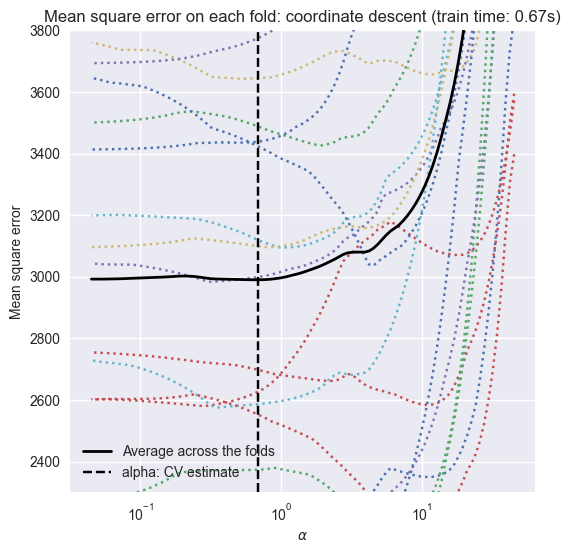

In [1]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap1\sourcecode")
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入数据分析库
import pandas as pd
# 导入模型评估的工具
# 导入数据集获取工具
from sklearn.datasets import load_diabetes
# 导入标准化处理工具
from sklearn.preprocessing import StandardScaler
# 导入LassoCV模型
from sklearn.linear_model import LassoCV, LassoLarsCV
# 导入管道操作
from sklearn.pipeline import make_pipeline
# 导入时间库
import time
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 导入数据集
X, y = load_diabetes(return_X_y=True, as_frame=True)
# 在原始数据集中加入一些随机特征，增加变量
np.random.seed(42)
# 特征数
n_random_features = 14
# 生成随机的X
X_random = pd.DataFrame(
    np.random.randn(X.shape[0], n_random_features),
    columns=[f"random_{i:02d}" for i in range(n_random_features)],
)
# 合并X
X = pd.concat([X, X_random], axis=1)
# 查看下数据
print(X[X.columns[::3]].head())
# 开始计时
start_time = time.time()
# 建立Lasso CV模型
model1 = make_pipeline(
    StandardScaler(), LassoCV(cv=20) # 自动赋alpha惩罚系数
)
# 模型拟合
model1.fit(X, y)
# 拟合时间
fit_time = time.time() - start_time
ymin, ymax = 2300, 3800
# 获取lasso模型
lasso = model1[-1]
fig1, ax = plt.subplots(figsize=(6,6))
# 绘制每一折下mse的值
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
ax.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1), # 每一个alpha下，交叉验证的mse的平均值
    color="black",
    label="Average across the folds",
    linewidth=2,
)
# 画竖直线
ax.axvline(
    lasso.alpha_, 
    linestyle="--", 
    color="black", 
    label="alpha: CV estimate"
)
# 设置横纵轴范围
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("Mean square error")
# 添加图例
ax.legend()
ax.set_title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)
plt.show()
fig1.savefig("../codeimage/code12.pdf")

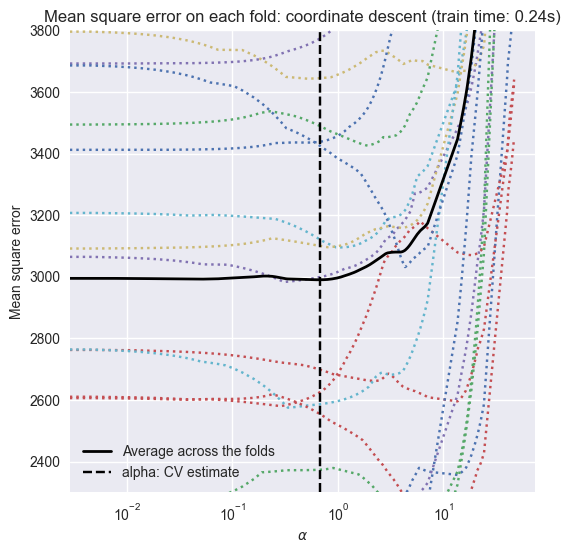

In [2]:
# 开始计时
start_time = time.time()
# 建立LassolarCV模型
model2 = make_pipeline(
    StandardScaler(), 
    LassoLarsCV(cv=20)
)
# 模型拟合
model2.fit(X, y)
# 拟合时间
fit_time = time.time() - start_time
ymin, ymax = 2300, 3800
# 获取lasso模型
lasso = model2[-1]
fig2, ax = plt.subplots(figsize=(6,6))
# 绘制每一折下mse的值
plt.semilogx(lasso.cv_alphas_, lasso.mse_path_, linestyle=":")
ax.plot(
    lasso.cv_alphas_,
    lasso.mse_path_.mean(axis=-1), # 每一个alpha下，交叉验证的mse的平均值
    color="black",
    label="Average across the folds",
    linewidth=2,
)
# 画竖直线
ax.axvline(
    lasso.alpha_, 
    linestyle="--", 
    color="black", 
    label="alpha: CV estimate"
)
# 设置横纵轴范围
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("Mean square error")
# 添加图例
ax.legend()
ax.set_title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)
plt.show()
fig2.savefig("../codeimage/code13.pdf")